<a href="https://colab.research.google.com/github/Nelson-Muteti/R_EDA_Week_12/blob/main/Nelson_Muteti_Week_12_R_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nelson Muteti : Independent Project Week 9

## 1.1 Defining the Question
**A Kenyan entrepreneur has created an online cryptography course and wants to advertise it on her blog.**
**She currently targets audiences originating from various countries. In the past, she ran ads to advertise**
**a related course on the same blog and collected data in the process. She would now like to employ my** **services as a Data Science Consultant to help her identify which individuals are most likely to click**
**on her ads**

## 1.2 Defining Metrics for Success

**A succesful project will clean the data provided, perform Univariate and Bivariate**
**analysis of the variables and finally draw recommendations for the business.**

## 1.3 Understanding The context.

**The context here is an advertising one. We need to first understand how to measure the success rate of ads**
**posted on a site**.


## 1.4 Reading the data

In [1]:
library(data.table)

#fetch the data using fread()

df = fread('http://bit.ly/IPAdvertisingData')

#output and get a glimpse of data

head(df)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dttm>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [2]:

#get the dimensions of the dataset

dim(df)
#data has 1000 rows and 10 columns

[1] 1000   10

In [3]:
#get summary statistics of the data

summary(df)

 Daily Time Spent on Site      Age         Area Income    Daily Internet Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
 Ad Topic Line          City                Male         Country         
 Length:1000        Length:1000        Min.   :0.000   Length:1000       
 Class :character   Class :character   1st Qu.:0.000   Class :character  
 Mode  :character   Mode  :character   Median :0.000   Mode  :character  
                                       Mean   :0.481                     
                                       3rd Qu.:1.000                     
   

In [4]:
#get data types of each column

str(df)

Classes ‘data.table’ and 'data.frame':	1000 obs. of  10 variables:
 $ Daily Time Spent on Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily Internet Usage    : num  256 194 236 246 226 ...
 $ Ad Topic Line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : POSIXct, format: "2016-03-27 00:53:11" "2016-04-04 01:39:02" ...
 $ Clicked on Ad           : int  0 0 0 0 0 0 0 1 0 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 


## 1.5 External Data Validation

**I ensured that the data provided was logical and data types given matched the values in columns**

**The target column is the "Clicked Ad " column.**

**1 - Clicked the ad.**
**0 - did not click the ad.**

### Recode the factor variables

In [5]:

df$`Clicked on Ad` <-factor(df$`Clicked on Ad`, levels = c(0, 1), labels = c('No click', 'Clicked'))
df$Male <-factor(df$Male, levels = c(0, 1), labels = c('Female', 'Male'))
#convert the Male and Clicked Ad columns to factors

df$Male <- as.factor(df$Male)

#identify levels of column Male

levels(df$Male)


[1] "Female" "Male"

**Do the same for our target column**

In [6]:
df$`Clicked on Ad` <- as.factor(df$`Clicked on Ad`)

# identify levels of target column

levels(df$`Clicked on Ad`)

[1] "No click" "Clicked"

In [7]:
#now check the summary of columns

print(summary(df$`Clicked on Ad`))

# 500 people clicked on the ad while 500 did not click on the ad

No click  Clicked 
     500      500 


## 1.6 Data Cleaning

**First, we will check for NA values in data.**

In [8]:


# Now to check for NA values

is.na(df) # outputs boolean / logic values. True when there is NA values 

#           and False when there isn't

print(sum(is.na(df))) # checking for total count of NA values

# the count is 0;meaning no missing values in data

# now for a closer inspection of columns and any missing values 

# that may have been skipped

print(colSums(is.na(df)))

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


[1] 0
Daily Time Spent on Site                      Age              Area Income 
                       0                        0                        0 
    Daily Internet Usage            Ad Topic Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked on Ad 
                       0 


**Next we check for duplicated rows of data.**

In [9]:

# 0 missing values in each individual column

# Next we check for duplicated rows of data

#we call the unique rows mydf

mydf <- unique(df)

#check if rows were dropped

dim(mydf)

# no rows were dropped since all unique values correspond

# to initial dataset dimensions

[1] 1000   10

**Next we identify outliers in Numerical columns.**

In [10]:
# now we identify outliers in Numerical columns

# first identify the numerical columns

str(mydf)

# Numerical Columns : Daily Time Spent on Site,Age, Area Income, 

# Daily Internet Usage

Classes ‘data.table’ and 'data.frame':	1000 obs. of  10 variables:
 $ Daily Time Spent on Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily Internet Usage    : num  256 194 236 246 226 ...
 $ Ad Topic Line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : Factor w/ 2 levels "Female","Male": 1 2 1 2 1 2 1 2 2 2 ...
 $ Country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : POSIXct, format: "2016-03-27 00:53:11" "2016-04-04 01:39:02" ...
 $ Clicked on Ad           : Factor w/ 2 levels "No click","Clicked": 1 1 1 1 1 1 1 2 1 1 ...
 - attr(*, ".internal.selfref")=<externalptr>

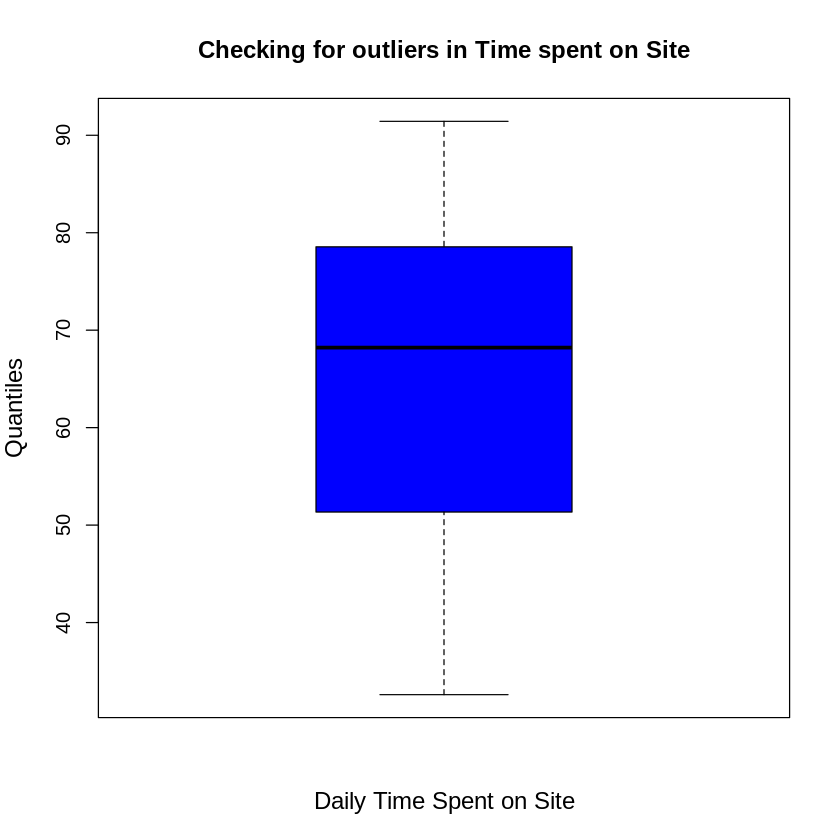

In [11]:

#use a boxplot to identify outliers

boxplot(mydf$`Daily Time Spent on Site`,col = 'blue',main="Checking for outliers in Time spent on Site",xlab="Daily Time Spent on Site",ylab = "Quantiles",cex.main = 1.2,cex.lab = 1.2)

# data points in this column seem to be well distributed

In [12]:
#now lets get all the outlier data points from the column

print(boxplot.stats(mydf$`Daily Time Spent on Site`)$out)

# there are 0 outliers here

numeric(0)


**We do the same for the other two numerical columns.**

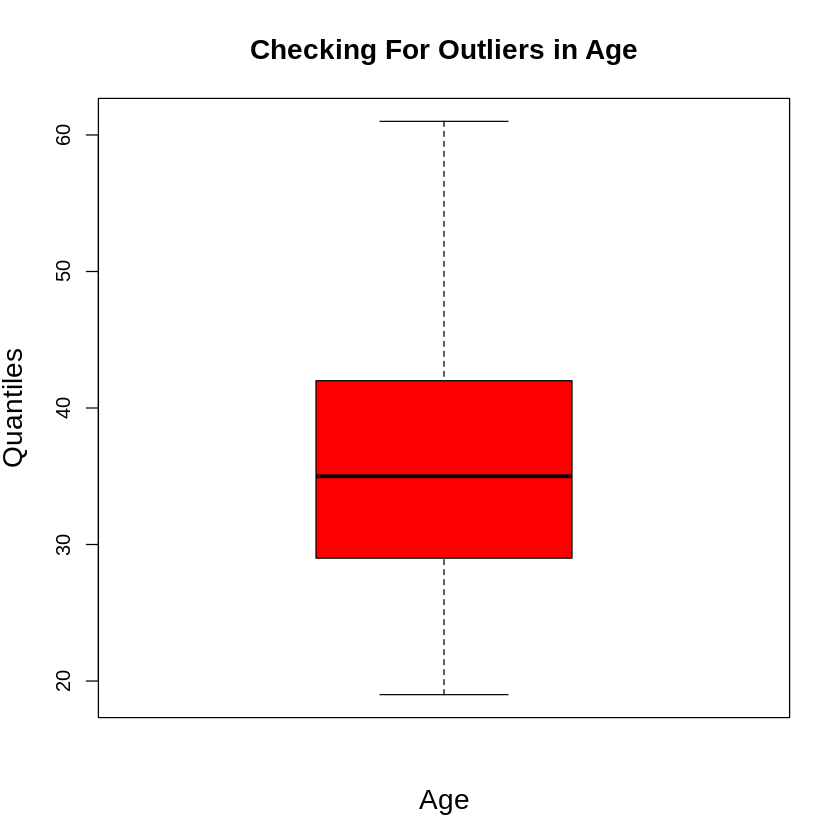

In [13]:
# we do the same for the other two numerical columns
boxplot(mydf$Age,col = 'red',main="Checking For Outliers in Age",xlab="Age",ylab = "Quantiles",cex.main = 1.4,cex.lab = 1.4)

In [14]:
print(boxplot.stats(mydf$Age)$out)

integer(0)


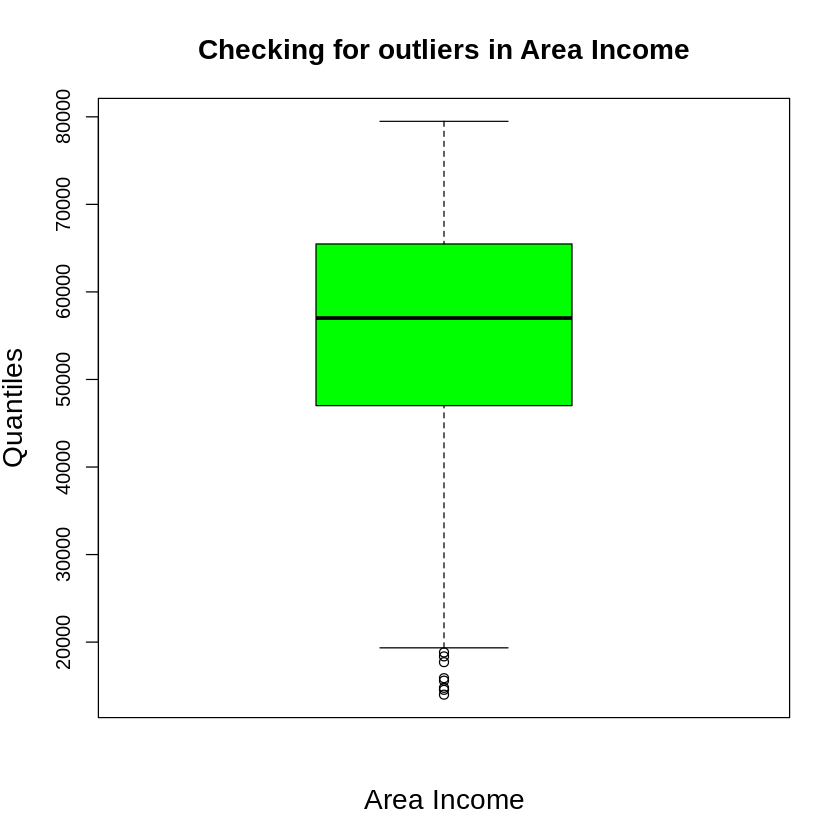

In [15]:
boxplot(mydf$`Area Income`,col = 'green',main="Checking for outliers in Area Income",xlab="Area Income",ylab="Quantiles",cex.main = 1.4,cex.lab = 1.4)

In [16]:

boxplot.stats(mydf$`Area Income`)$out

print(length(boxplot.stats(mydf$`Area Income`)$out))

# 8 outliers in the column.These few outliers will not have any effect to 

# the data. They are important to the data

[1] 17709.98 18819.34 15598.29 15879.10 14548.06 13996.50 14775.50 18368.57

[1] 8


**8 outliers in the column.These few outliers will not have any effect on**

**the data. They are important to the data.**

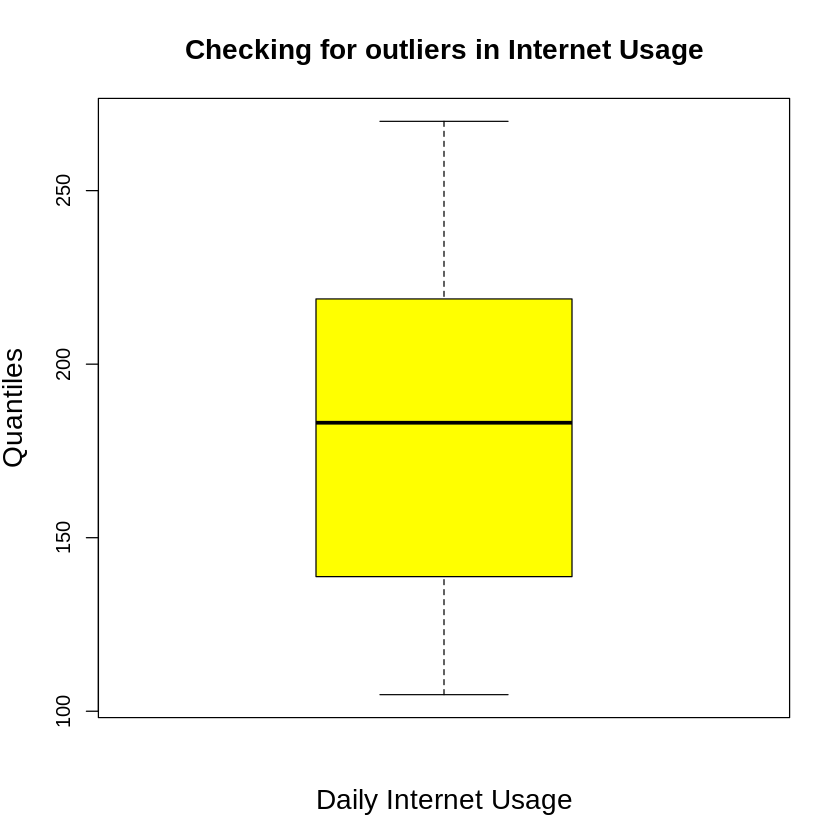

In [17]:
boxplot(mydf$`Daily Internet Usage`,col = 'yellow',main="Checking for outliers in Internet Usage",xlab="Daily Internet Usage",ylab = "Quantiles",cex.main = 1.4,cex.lab = 1.4)

In [18]:
print(boxplot.stats(mydf$`Daily Internet Usage`)$out)

numeric(0)


## 1.7 Univariate EDA

**Now we proceed to Univariate EDA.**

In [19]:

# first get measures of central tendency for age and other numerical columns

mean(mydf$`Daily Time Spent on Site`)



[1] 65.0002

In [20]:
median(mydf$`Daily Time Spent on Site`)



[1] 68.215

In [21]:
# function to get mode of data

mymod <- function(v){uniqv <- unique(v)
                     uniqv[which.max(tabulate(match(v,uniqv)))]
  
}



In [22]:
mean(mydf$Age)

# mean age of customers visiting site is 36

[1] 36.009

In [23]:

print(quantile(mydf$Age))

# age distribution of customers on site by quantiles



  0%  25%  50%  75% 100% 
  19   29   35   42   61 


In [24]:
mean(mydf$`Area Income`)



[1] 55000

In [25]:
print(quantile(mydf$`Area Income`))

# majority of customers visiting the site are from the  middle class 



      0%      25%      50%      75%     100% 
13996.50 47031.80 57012.30 65470.64 79484.80 


In [26]:
mymod(mydf$`Ad Topic Line`) # identify the most advertised topic

#Cloned 5thgeneration orchestration was the most advertised Ad to customers visiting the site



[1] "Cloned 5thgeneration orchestration"

In [27]:
mymod(mydf$City) # which is the most popular city of site visitors

# Lisamouth is the most popular city 

[1] "Lisamouth"

In [28]:
print(sapply(mydf, function(x) length(unique(x))))# get unique values of each column

#so there are 237 unique countries in the dataFrame

Daily Time Spent on Site                      Age              Area Income 
                     900                       43                     1000 
    Daily Internet Usage            Ad Topic Line                     City 
                     966                     1000                      969 
                    Male                  Country                Timestamp 
                       2                      237                     1000 
           Clicked on Ad 
                       2 


**Barplot for Gender in data.**

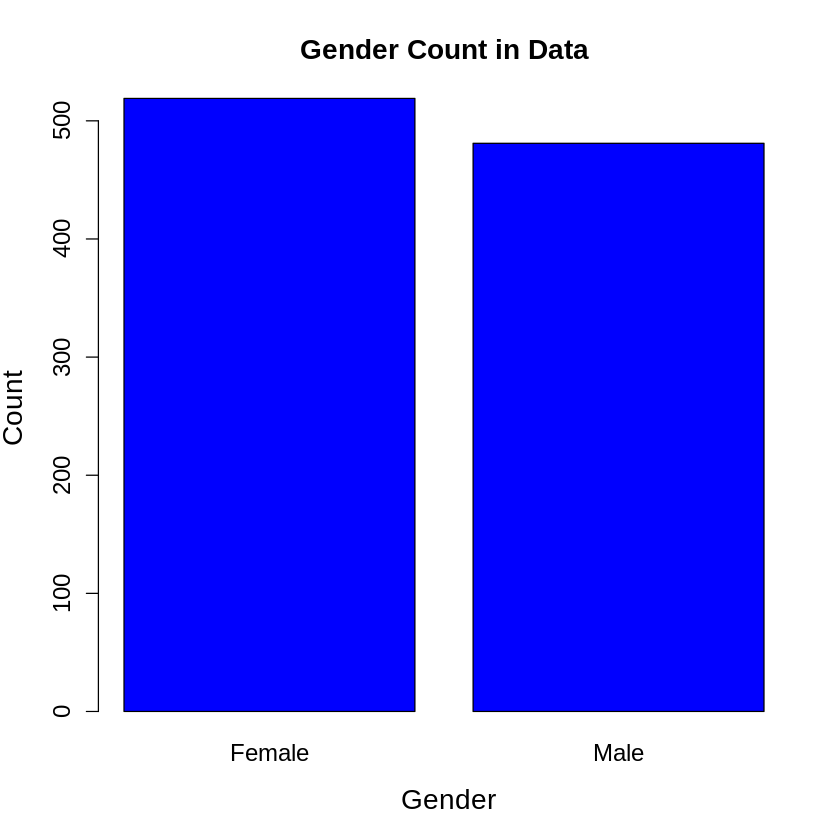

In [73]:
# Barplot for Gender in data

df_gender <- mydf$Male

df_gender <- table(df_gender)

barplot(df_gender,col = 'blue',xlab = " Gender",ylab = "Count",main = "Gender Count in Data",cex.main = 1.4,cex.lab = 1.4,cex.axis = 1.2,cex.names = 1.2)

**Barplot for Ad clicks in data**

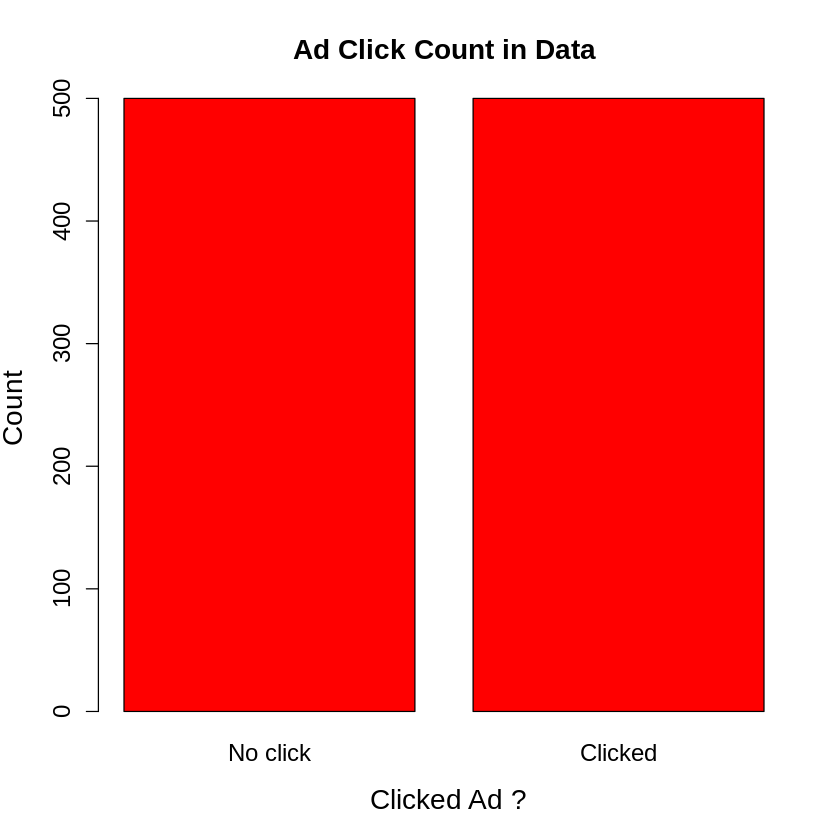

In [72]:

# barplot for Ad clicks in data

df_click <- mydf$`Clicked on Ad`

df_click <- table(df_click)

barplot(df_click,col = 'red',xlab = " Clicked Ad ?",ylab = "Count",main = "Ad Click Count in Data",cex.main = 1.4,cex.lab = 1.4,cex.axis = 1.2,cex.names = 1.2)

**Age histogram**

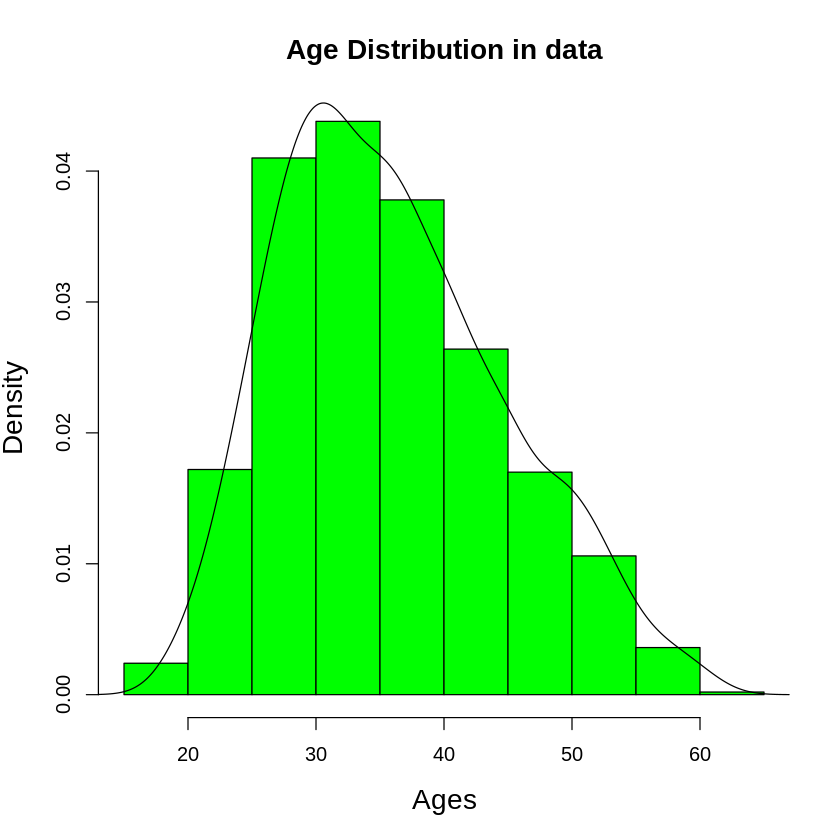

In [31]:
# age histogram

hist(mydf$Age,col = 'green',xlab = 'Ages',main = "Age Distribution in data",freq = FALSE,cex.main = 1.4,cex.lab = 1.4)

# include a Kernel density estimator line on Histogram

dens <- density(mydf$Age)
# include the KDE line
lines(dens)

# distribution of ages in data seems to be normal (bell - curve)

**Distribution of ages in data seems to be normal (bell - curve).**





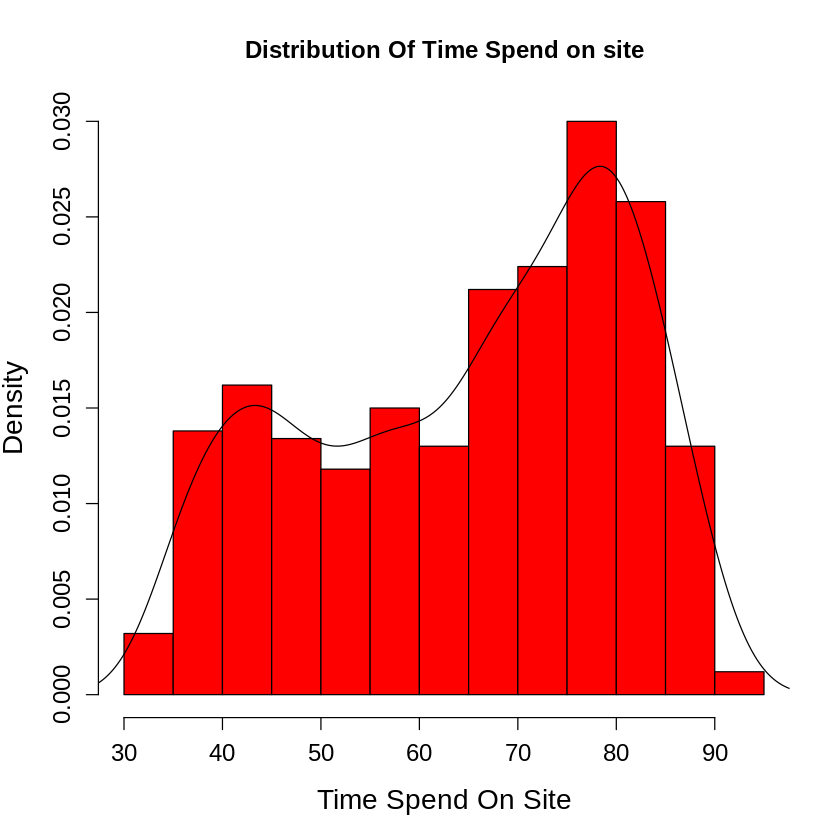

In [76]:
hist(mydf$`Daily Time Spent on Site`,col = 'red',xlab = 'Time Spend On Site',main = "Distribution Of Time Spend on site",freq = FALSE,cex.main = 1.2,cex.lab = 1.4,cex.axis=1.2)

# include a Kernel density estimator line on Histogram

dens <- density(mydf$`Daily Time Spent on Site`)
# include the KDE line
lines(dens)


**Now lets get the ranges,standard Deviations, Variances  and skewness of various** **Numerical columns**

In [33]:
#range of Age

range(mydf$Age)

[1] 19 61

In [34]:
#variance of age

var(mydf$Age)

[1] 77.18611

In [35]:
# range of incomes

range(mydf$`Area Income`)

[1] 13996.5 79484.8

In [36]:
# variance of incomes in data

var(mydf$`Area Income`)

[1] 179952406

In [37]:
install.packages("moments")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [38]:
library(moments)

Now check for skewness and kurtosis of time spend on site and Internet usage columns

In [39]:
skewness(mydf$`Daily Time Spent on Site`)

[1] -0.3712026

**Time spend on site has a negative skewness. This means that majority of data  points are greater than the mean.On average, most people spend a lot of time on the site.**

In [40]:
skewness(mydf$`Daily Internet Usage`)

[1] -0.03348703

**1.Daily Internet usage also has a negative skewness. This means that majority of data points are greater than the mean.Most people visiting the site use more than the average daily internet**

## 1.8.Bi-Variate Analysis

**First, a side by side boxplot.**

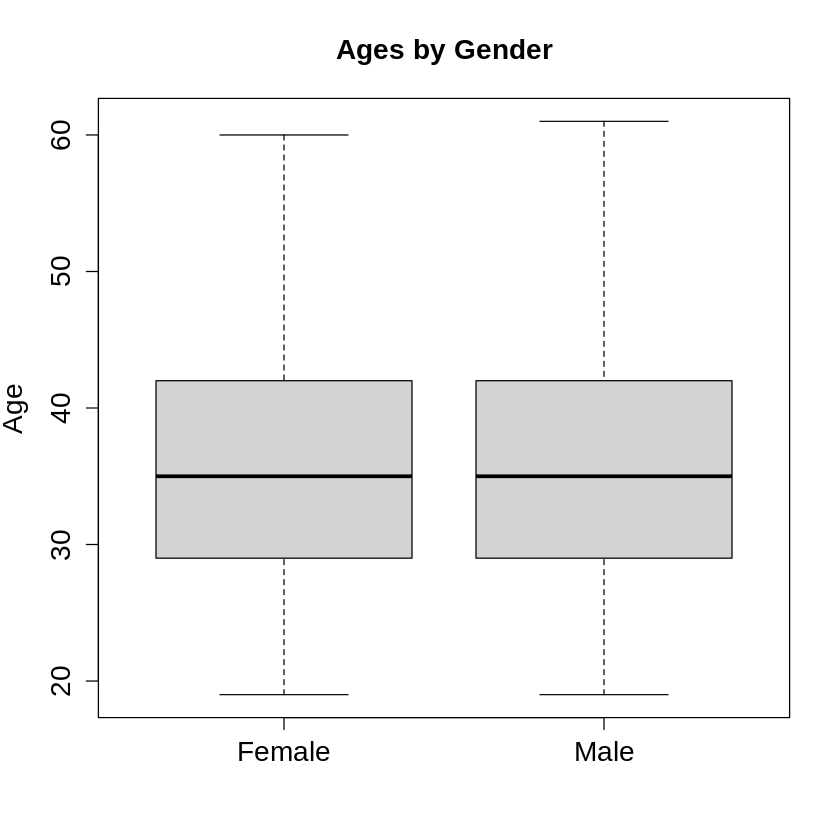

In [64]:

boxplot(Age ~ Male,data = mydf,main = "Ages by Gender",cex.main = 1.4,cex.lab = 1.4,cex.axis = 1.4,xlab = "")

#the distribution of ages does not vary by gender

In [42]:
print(tapply(mydf$Age,mydf$Male,mean))

# get the mean of ages grouped by gender..as we can see, mean does not vary with gender

  Female     Male 
36.18690 35.81705 


**Get a side by side boxplot for ad clicks.**

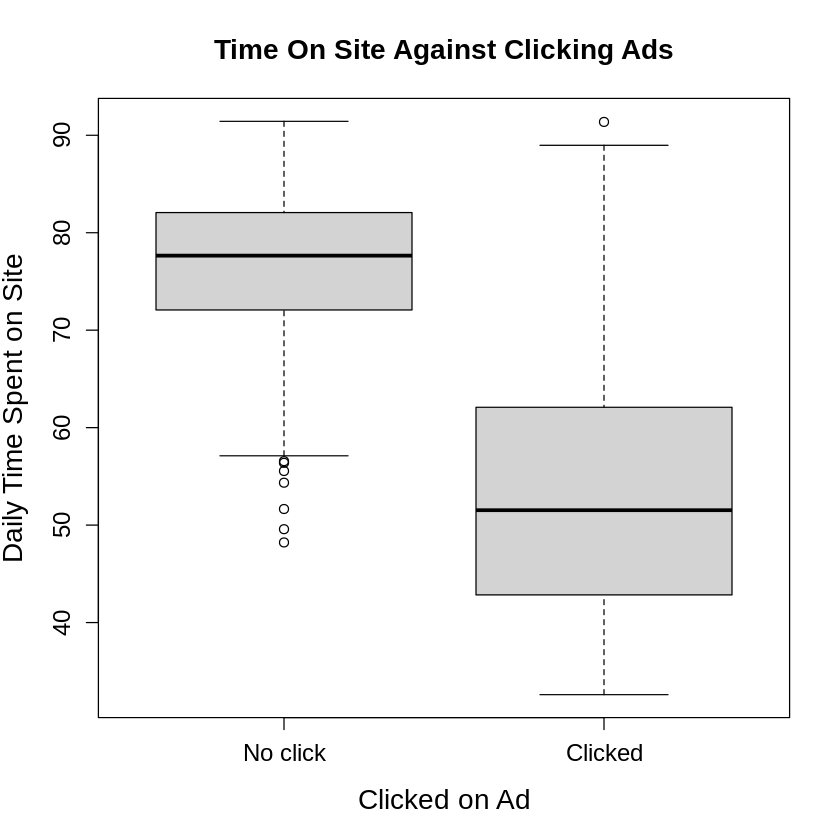

In [65]:
# get a side by side boxplot for ad clicks

boxplot(`Daily Time Spent on Site`~`Clicked on Ad`,data = mydf,main = "Time On Site Against Clicking Ads",cex.main = 1.4,cex.lab = 1.4,cex.axis=1.2)

# it seems that people who spend less time on the site are more likely to click on

# the ads

In [44]:
# Identify difference in times of people who either clicked or did not click ADs

print(tapply(mydf$`Daily Time Spent on Site`,mydf$`Clicked on Ad`,mean))

# the average time of people who clicked on ADs is considerably less than

# those who did not click on ADs

No click  Clicked 
76.85462 53.14578 


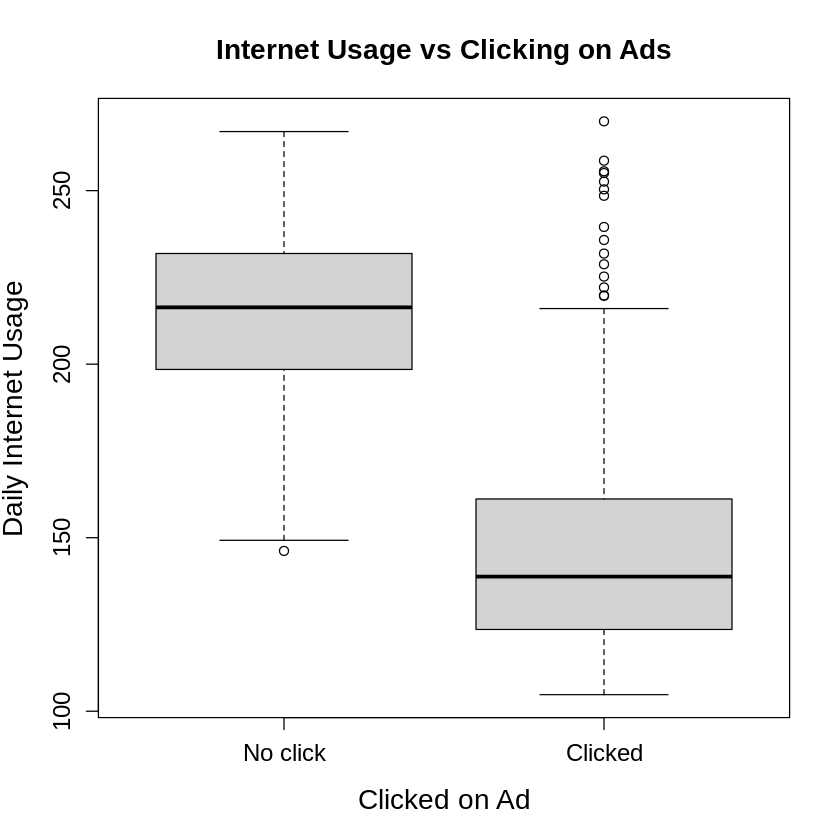

In [66]:
boxplot(`Daily Internet Usage`~`Clicked on Ad`,data = mydf,main = "Internet Usage vs Clicking on Ads",cex.main = 1.4,cex.lab = 1.4,cex.axis=1.2)

# people with less daily internet usage were more likely to click an Ad

In [46]:
print(tapply(mydf$`Daily Internet Usage`,mydf$`Clicked on Ad`,mean))



No click  Clicked 
214.5137 145.4865 


**Distribution of age vs Income**

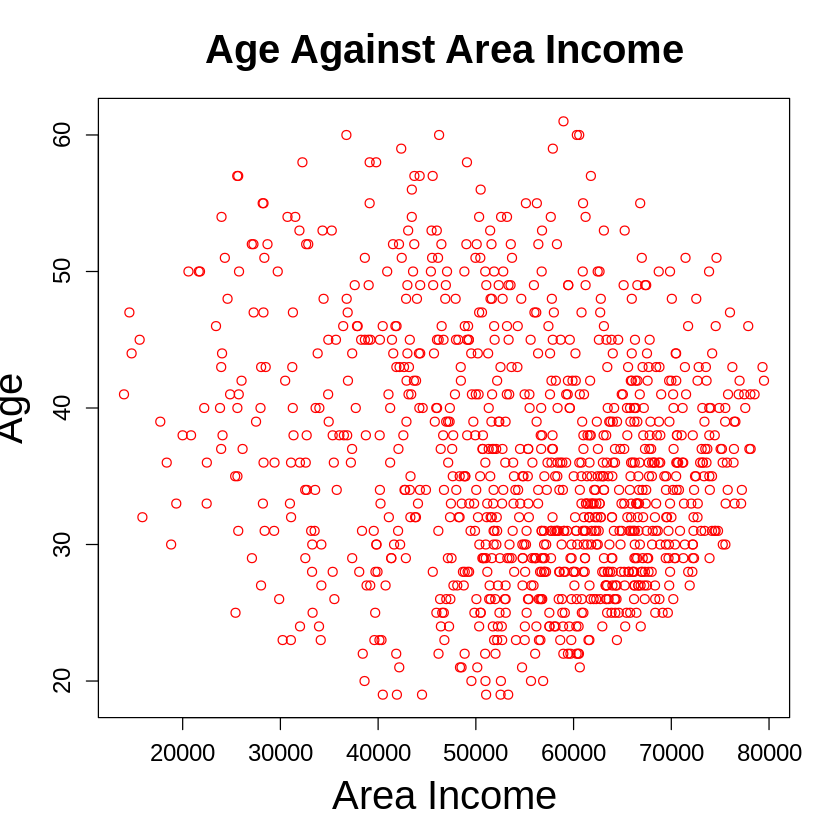

In [77]:
# distribution of age vs Income
plot(Age~`Area Income`,data = mydf,main = "Age Against Area Income",cex.main = 2,cex.lab = 2,cex.axis=1.2,col = "red")

**Find the correlation between age and are income.**

In [48]:
# find the correlation between age and are income

print(cor(mydf$Age,mydf$`Area Income`))

# weak negative correlation between age and income

[1] -0.182605


**Distribution of time spend on site and daily internet usage.**

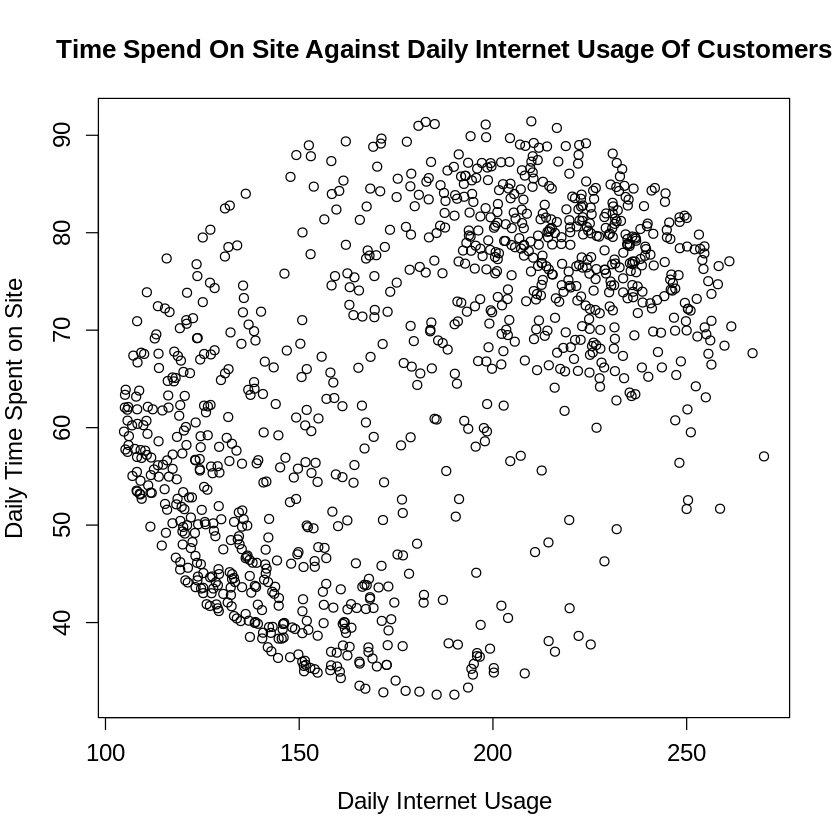

In [68]:
# distribution of time spend on site and daily internet usage

plot(`Daily Time Spent on Site`~`Daily Internet Usage`,data = mydf,main = "Time Spend On Site Against Daily Internet Usage Of Customers",cex.axis=1.2,cex.main = 1.3,cex.lab = 1.2)

Now find corrrelation between daily time spend on sight and internet usage

In [50]:
# now find corrrelation between daily time spend on sight and internet usage

cor(mydf$`Daily Time Spent on Site`,mydf$`Daily Internet Usage`)

# there is a relatively moderate correlation between time spend on site and internet usage

[1] 0.5186585

**Now lets plot all scatter pairs for numeric variables.**

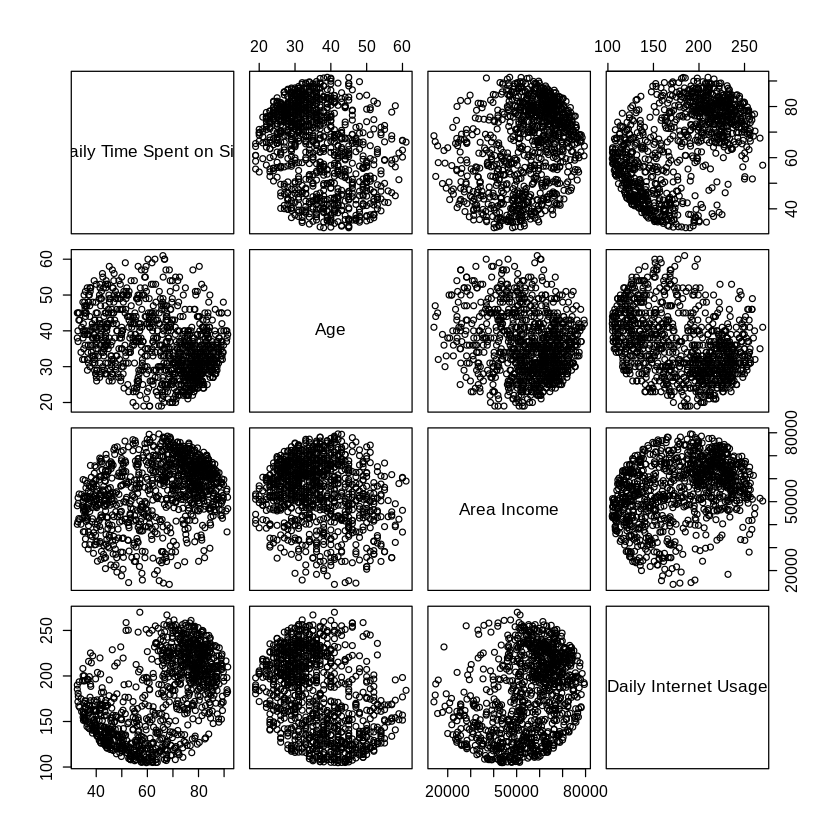

In [69]:

mydf$Age <- as.numeric(mydf$Age)

pairs(mydf[,-c(5,6,7,8,9,10)],cex.labels = 1.3,cex.axis=1.2)

# now we have all scatter plot pairs from the data

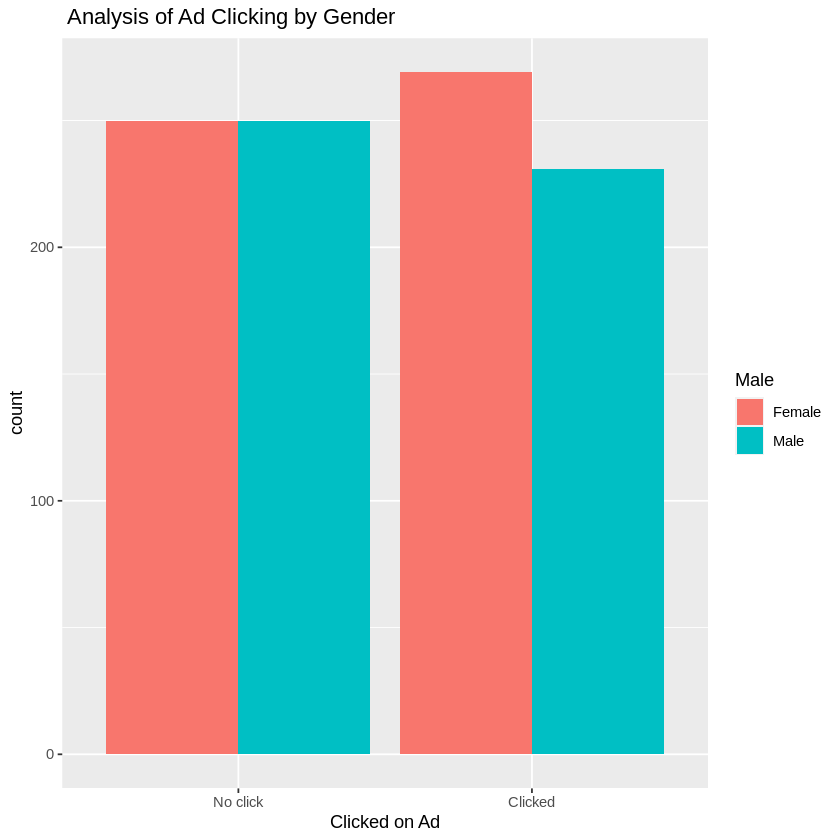

In [52]:
library(ggplot2)

ggplot(mydf,
       aes(x = `Clicked on Ad`,
           fill = Male))+
  geom_bar(position = "dodge")+
  labs(title = " Analysis of Ad Clicking by Gender")

## 1.9 .Multivariate analysis


**Get the corrrelation matrix from the data.**

In [53]:
# some Multivariate analysis

# get the corrrelation matrix from the data

cor(mydf[,-c(5,6,7,8,9,10)])

# we can see that the area income and daily internet usage have a weak but positive

# linear relationship

# the daily time spend on site is also moderately correlated to the daily internet use

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Daily Time Spent on Site,1.0000000,-0.3315133,0.3109544,0.5186585
Age,-0.3315133,1.0000000,-0.1826050,-0.3672086
Area Income,0.3109544,-0.1826050,1.0000000,0.3374955
Daily Internet Usage,0.5186585,-0.3672086,0.3374955,1.0000000


**Now lets get the multivariate aggregates of numerical variables.**

In [54]:
# now lets get the multivariate aggregates of numerical variables

print(aggregate(mydf$`Daily Time Spent on Site`~mydf$`Clicked on Ad`+mydf$Male,FUN = mean))

  mydf$`Clicked on Ad` mydf$Male mydf$`Daily Time Spent on Site`
1             No click    Female                        77.00012
2              Clicked    Female                        54.40561
3             No click      Male                        76.70912
4              Clicked      Male                        51.67870


**Now lets get the number of people that clicked on ads given their gender only using a crosstab.**

In [55]:

table(mydf$`Clicked on Ad`,mydf$Male)

#relatively more females clicked on ADs. But this could be due to the reason that there were more women sampled

          
           Female Male
  No click    250  250
  Clicked     269  231

**Now lets investigate the relationship between clicking of ads and internet usage + time spend on site.**

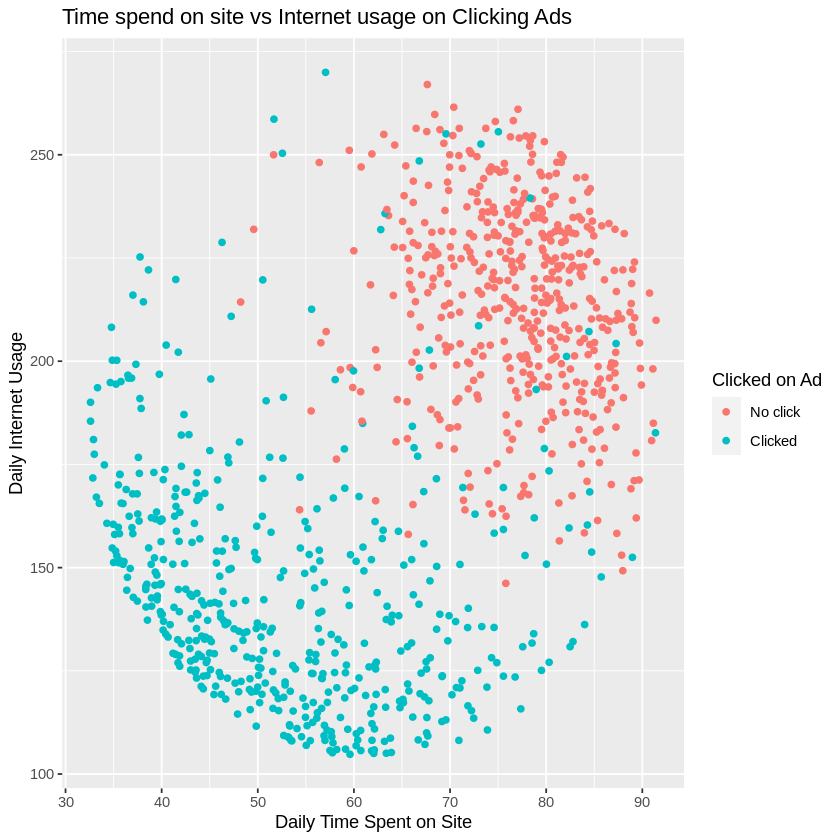

In [85]:

ggplot(mydf,
       aes(x = `Daily Time Spent on Site`,
           y = `Daily Internet Usage`,
           color=`Clicked on Ad`))+
  geom_point()+labs(title = "Time spend on site vs Internet usage on Clicking Ads")


# we can see that individuals who spend less time on the site 

#and had less data per day were more likely to click on the ADs


## 2.0. Recommendations.


**1.We can see that individuals who spend less time on the site and had less data per day were more likely to click on the ADs and had less data per day were more likely to click on the ADs.The Ad company should most probably target these individuals.** 


**2.Since most of the customers visiting the site spend more time on the site than the average time spent, the Advertising team should consider pitching Ads that are relevant to the site or topic they are interested in.**

## 2.1. Challenging The Solution.

**The data acquired should probably have been more to do with the topics of the site visited rather than the clients visiting the site.**

**This would have given has more clarity on the type of interests the customers have.**